## Problem 2

In [153]:
import scipy as sp
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import Image

In [356]:
os.chdir(r'C:\Users\ivang\Desktop\lamps\lesson3.out')

In [72]:
def mult(x,y): #supplementary function to get u(0)u(t) among ensemble
    res = list()
    for i in range(np.shape(x)[0]):
        res.append(np.dot(x[i],y[i]))
    return res

In [74]:
def get_u(x): #getting coordinates
    u = list()
    for i in range(233):
        v = -2*x[3*i][2:5]+x[3*i+1][2:5]+x[3*i+2][2:5]
        u.append(v/np.linalg.norm(v,2))
    return np.array(u)

In [90]:
s=10000

In [91]:
results = {}
for i in range(s+1):
    x = np.genfromtxt(f'dump.{i}.txt',skip_header=9,delimiter=' ')
    results[i] = get_u(x)

In [357]:
T_rho = np.genfromtxt(f'T_and_rho.txt',skip_header=1,delimiter=' ')

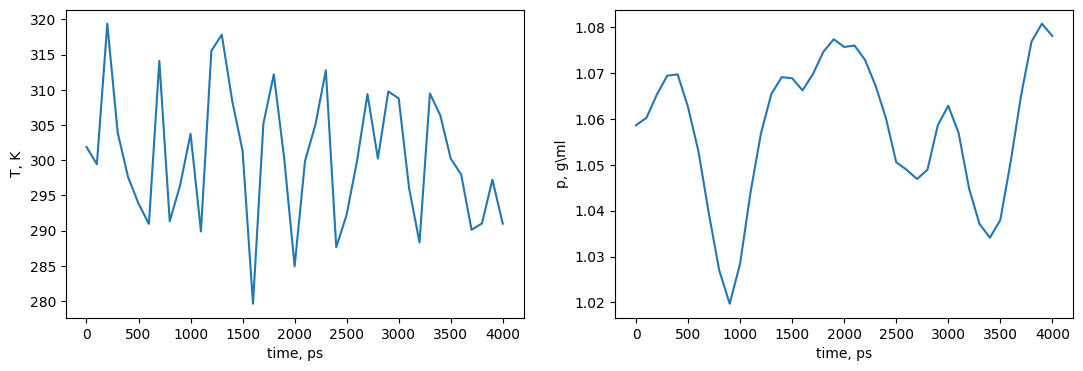

In [373]:
fig,ax = plt.subplots(1,2,figsize=(13,4))
ax[0].plot(T_rho[:,0],T_rho[:,1])
ax[0].set_xlabel('time, ps')
ax[0].set_ylabel('T, K')
ax[1].plot(T_rho[:,0],T_rho[:,2])
ax[1].set_xlabel('time, ps')
ax[1].set_ylabel('p, g\ml');

In [ ]:
Ku = np.empty((s+1,1))
for i in range(s+1):
    res = mult(results[0],results[i])
    Ku[i,0] = np.mean(res)

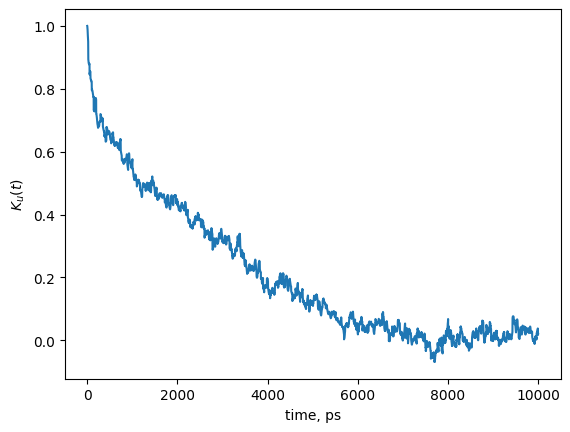

In [115]:
plt.plot(np.arange(s+1),Ku)
plt.xlabel('time, ps')
plt.ylabel('$K_u(t)$');

In [94]:
Psi_2 = np.empty((s+1,1))
Psi_3 = np.empty((s+1,1))
for i in range(s+1):
    res = mult(results[0],results[i])
    Psi_2[i,0] = np.mean(sp.special.legendre(2)([res]))
    Psi_3[i,0] = np.mean(sp.special.legendre(3)([res]))

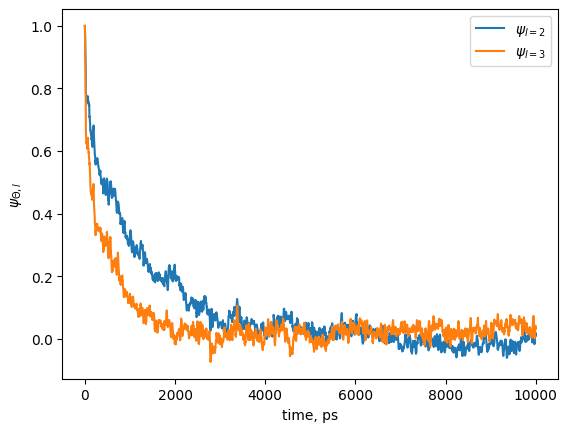

In [127]:
plt.plot(np.arange(s+1),Psi_2,label='$\psi_{l=2}$')
plt.plot(np.arange(s+1),Psi_3,label='$\psi_{l=3}$')
plt.xlabel('time, ps')
plt.ylabel('$\psi_{\Theta,l}$');
plt.legend()

In [269]:
dt = 1 # ps
r_2 = np.sum(Psi_2)*dt
r_3 = np.sum(Psi_3)*dt
r_t = np.sum(Ku)*dt

In [270]:
print('r_2:',r_2,'\nr_3:',r_3,'\nr_u:',r_t)

r_2: 931.4107301081219 
r_3: 555.8918099487887 
r_u: 2078.805493401554


In [109]:
results_f = {}
for i in range(s+1):
    x = np.genfromtxt(f'dump_f.{i}.txt',skip_header=9,delimiter=' ')
    results_f[i] = get_u(x)

In [110]:
Ku_v = np.empty((s+1,1))
for i in range(s+1):
    res = mult(results_f[0],results_f[i])
    Ku_v[i,0] = np.mean(res)

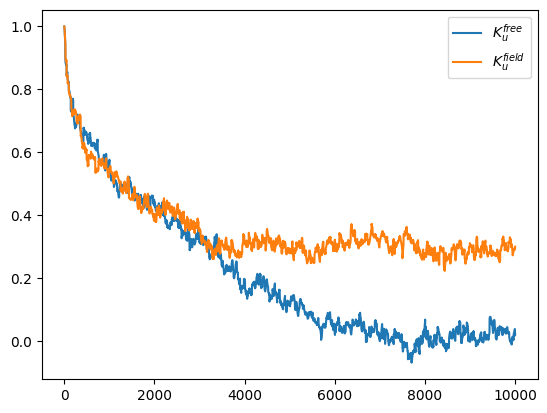

In [355]:
plt.plot(np.arange(s+1),Ku,label='$K_u^{free}$')
plt.plot(np.arange(s+1),Ku_v,label='$K_{u}^{field}$')
plt.legend()

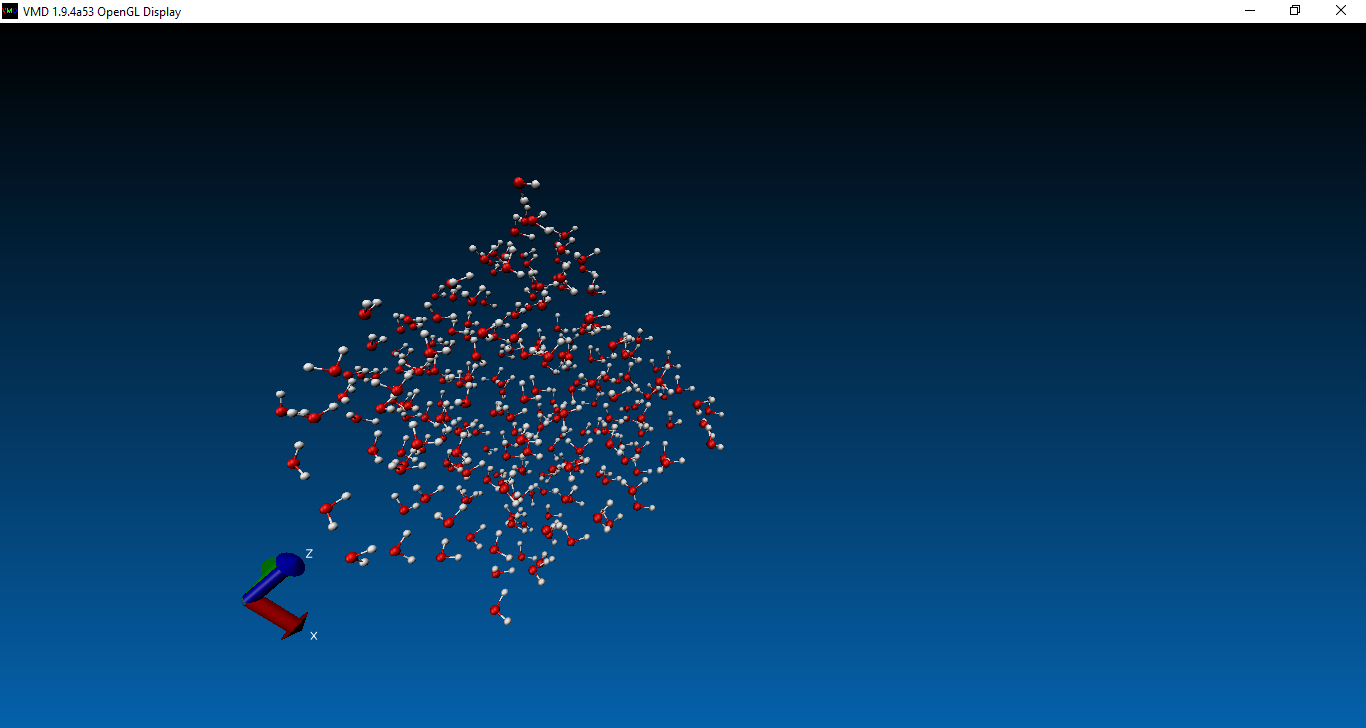

In [164]:
Image(filename=r'C:\Users\ivang\Desktop\skoltech_courses\multsc modeling\asd.png')

Most of the molecules are oriented along the electric field

## Problem 3

In [172]:
x = np.genfromtxt(f'MSD.txt',skip_header=1,delimiter=' ')
print('Diffusion coefficient:', x[-1][-1]/(6*x[-1][0]))

Diffusion coefficient: 0.0003222856626791218


There is an experimental approach to estimate D via Stokes-Einstein formula. For example, using vertical tube of liquid and metal balls. 

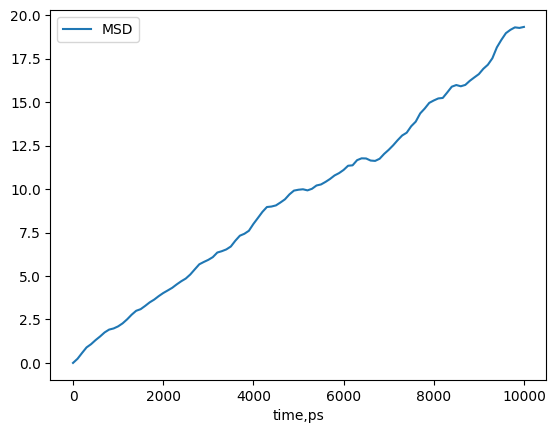

In [171]:
plt.plot(x[:,0],x[:,1], label = 'MSD')
plt.xlabel('time,ps')
plt.legend()

In [175]:
rdf = np.genfromtxt(f'RDF.txt',skip_header=4,delimiter=' ')

In [182]:
x = rdf[:,1]
rdf_oo = rdf[:,2]
rdf_oh = rdf[:,4]

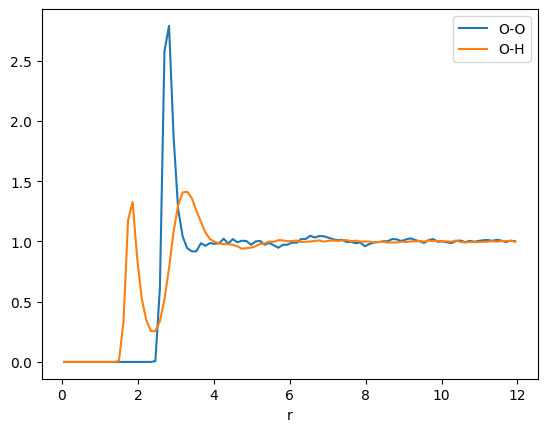

In [184]:
plt.plot(x,rdf_oo, label='O-O')
plt.plot(x,rdf_oh, label='O-H')
plt.xlabel('r')
plt.legend()

In [195]:
print('d_oo:',x[np.argmax(rdf_oo)])
print('d_oh:',x[np.argmax(rdf_oh)])

d_oo: 2.82
d_oh: 3.3


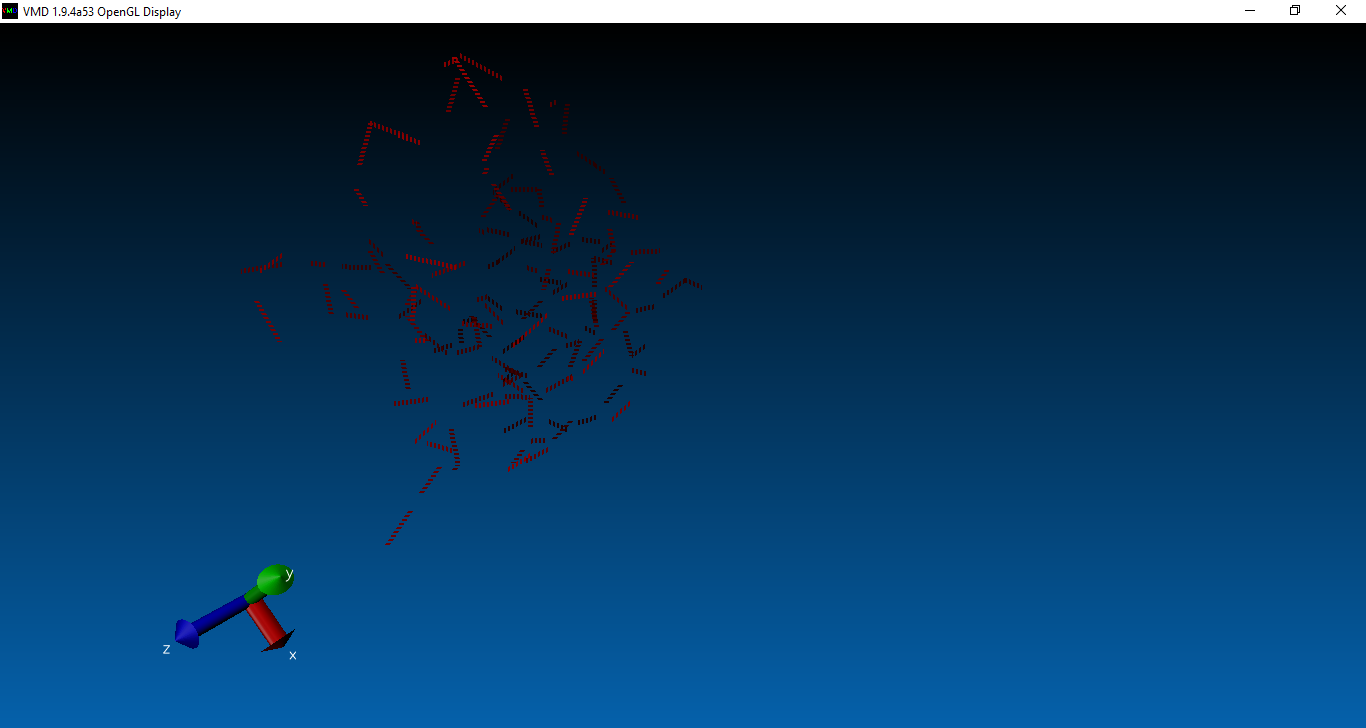

In [194]:
Image(filename=r'C:\Users\ivang\Desktop\skoltech_courses\multsc modeling\hbond.png')

## Problem 4

In [322]:
os.chdir(r'C:\Users\ivang\Desktop\lamps\lesson4.out')

In [350]:
vcf_l = np.genfromtxt(f'vacf_l.txt',skip_header=1,delimiter=' ')
vcf_s = np.genfromtxt(f'vacf_s.txt',skip_header=1,delimiter=' ')
vcf_g = np.genfromtxt(f'vacf_g.txt',skip_header=1,delimiter=' ')

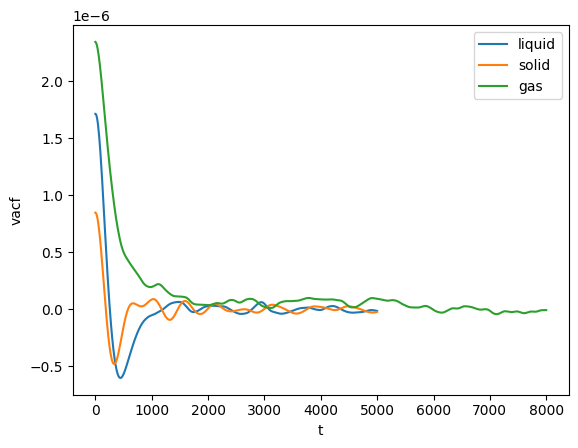

In [351]:
plt.plot(vcf_l[:,0],vcf_l[:,1],label='liquid')
plt.plot(vcf_s[:,0],vcf_s[:,1],label='solid')
plt.plot(vcf_g[:,0],vcf_g[:,1],label='gas')
plt.xlabel('t')
plt.ylabel('vacf')
plt.legend()

In [352]:
msd_arg = np.genfromtxt(f'MSD_arg.txt',skip_header=1,delimiter=' ')

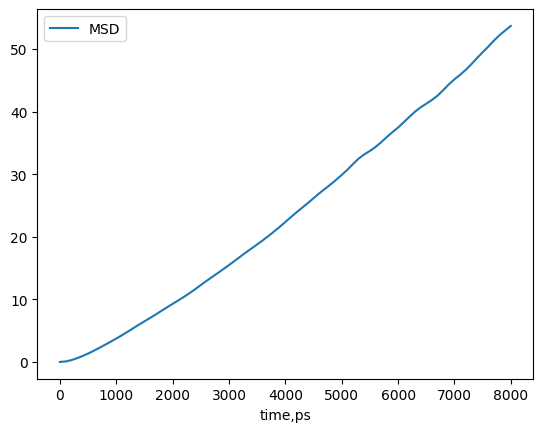

In [353]:
plt.plot(msd_arg[:,0],msd_arg[:,1], label = 'MSD')
plt.xlabel('time,ps')
plt.legend()

In [354]:
print('Diffusion coef via vacf:',np.sum(vcf_g[:,1])/3)
print('Diffusion coef via msd:',msd_arg[-1][-1]/(6*msd_arg[-1][0]))

Diffusion coef via vacf: 3.86838561978586e-05
Diffusion coef via msd: 0.0011182550776095866


## Problem 5

In [274]:
def f(x):
    return -x

In [275]:
def g(x):
    return x**2

In [276]:
def dg(x):
    return 2*x

In [310]:
def iter_euler(dt,Niter,y0): # https://math.gmu.edu/~tsauer/pre/sde.pdf p.5 
    results = list()
    results.append(y0)
    
    for i in range(Niter):
        new_val = results[-1]+f(results[-1])*dt+g(results[-1])*np.random.normal()*(dt**0.5)
        results.append(new_val)
    return results

In [278]:
def iter_lec(dt,Niter,y0): #from lecture notes
    results = list()
    results.append(y0)
    
    for i in range(Niter):
        Z = np.random.normal()*(dt**0.5)
        new_val = results[-1]+g(results[-1])*Z+f(results[-1])*dt+0.5*g(results[-1])*dg(results[-1])*(Z**2)
        results.append(new_val)
    return results

In [296]:
res1 = iter_euler(0.001,1000,1)
res2 = iter_lec(0.001,1000,1)

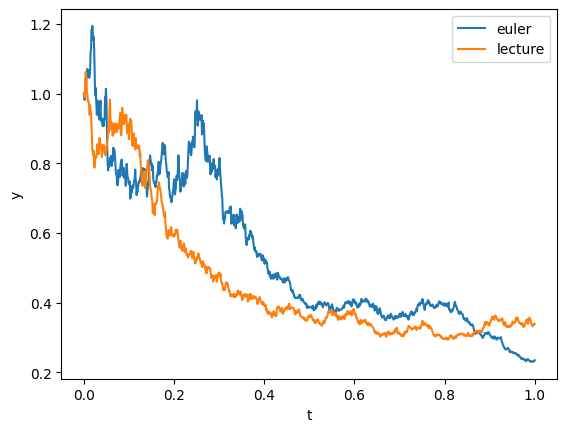

In [321]:
t = np.arange(0,0.001*1000+0.001,0.001)
plt.plot(t,res1,label='euler')
plt.plot(t,res2,label='lecture')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

In [281]:
def corr_func(x):
    y = list()
    for i in range(np.shape(x)[1]):
        y.append(np.mean(x[:,0]*x[:,i])/np.mean(x[:,0]*x[:,0]))
    return y

In [298]:
N_samples = 100
N_iter = 10000
results = np.empty((N_samples,N_iter+1))
for i in range(N_samples):
    results[i,:] = iter_euler(0.0001,N_iter,1)
    

In [299]:
vacf = corr_func(results)

Text(0, 0.5, 'Corr. func')

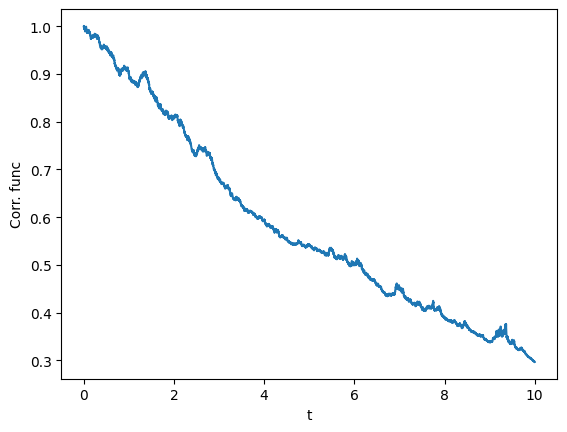

In [300]:
t = np.arange(0,0.01*1000+0.001,0.001)
plt.plot(t,vacf)
plt.xlabel('t')
plt.ylabel('Corr. func')

In [311]:
def iter_add(x0,D,dt,Niter): #additive noise
    x = list()
    x.append(x0)
    for i in range(Niter):
        new_val_x = x[-1]+(2*D)**0.5*dt**0.5*np.random.normal()
        x.append(new_val_x)
    return x

In [312]:
N_samples = 100
N_iter = 10000
results_add = np.empty((N_samples,N_iter+1))
for i in range(N_samples):
    results_add[i,:] = iter_add(Niter=N_iter,dt=0.001,x0=1,D=1)

In [313]:
def w(dt,tau):
    y0 = np.random.normal()
    y1 = np.random.normal()
    
    w0_sq = tau/2*(1-np.exp(-2*dt/tau))
    w0 = w0_sq**0.5*y0
    
    w1w0 = tau**2/2*(1-2*np.exp(-dt/tau)+np.exp(-2*dt/tau))
    w1_sq = tau**3/2*(2*dt/tau-3-np.exp(-2*dt/tau)+4*np.exp(-dt/tau))
    w1 = w1w0/(w0_sq)**0.5*y0+(w1_sq-(w1w0)**2/w0_sq)**0.5*y1
    
    return w0,w1

In [314]:
def iter_color(dt,tau,D,Niter,y0): #colored noise
    y = list()
    x = list()
    y.append(y0)
    x.append(y0*dt)
    for i in range(Niter):
        w0,w1 = w(dt,tau)
        new_val_y = y[-1]*np.exp(-dt/tau)+(2*D)**0.5/tau*w0
        new_val_x = x[-1]+tau*(1-np.exp(-dt/tau))*y[-1]+(2*D)**0.5/tau*w1
        y.append(new_val_y)
        x.append(new_val_x)
    return x

In [316]:
N_samples = 100
N_iter = 10000
results_col = np.empty((N_samples,N_iter+1))
for i in range(N_samples):
    results_col[i,:] = iter_color(dt=0.001,tau=1,D=1,Niter=N_iter,y0=1)

In [374]:
def msd(x):
    y = list()
    for i in range(np.shape(x)[1]):
        y.append(np.mean((x[:,i]-x[:,0])**2))
    return y

In [317]:
meansd = msd(results_col)

In [318]:
meansdadd=msd(results_add)

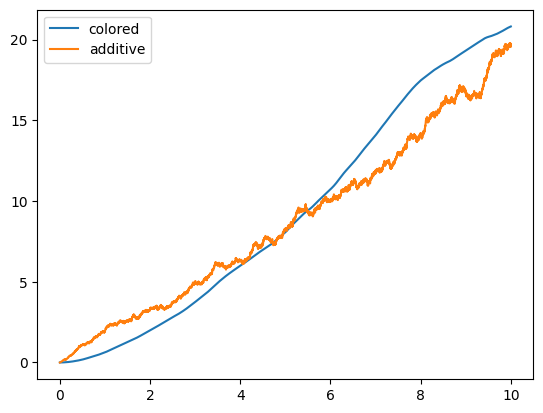

In [320]:
t = np.arange(0,0.001*10000+0.001,0.001)
plt.plot(t,meansd,label='colored')
plt.plot(t,meansdadd, label='additive')
plt.legend()